In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import ProbPlot
import matplotlib.pyplot as plt
import seaborn as sns

db1 = pd.read_excel('/Users/Alex/Google Drive (alex.keeney766@gmail.com)/College /Fall 2018/Research Methods/dataframePerminant.xlsx')
# create useable data Without 2008
db2 = db1.loc[db1.year != 2008, :]
data = db2.loc[:, 'Constant_Tuition':'Applicants']

In [22]:
# Attempt residual plots
import seaborn as sns
plt.style.use('seaborn') #pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)


model = ols('Constant_Tuition ~ Constant_APGF + Constant_AFSLF + Applicants + rank + Private', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Constant_Tuition   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     2070.
Date:                Sun, 09 Dec 2018   Prob (F-statistic):               0.00
Time:                        09:20:27   Log-Likelihood:                -9750.1
No. Observations:                 984   AIC:                         1.951e+04
Df Residuals:                     978   BIC:                         1.954e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.268e+04   2534.697      5.

In [23]:
# Calculations for Residual Plots
model_fitted_y = model.fittedvalues

model_residuals = model.resid

model_norm_residuals = model.get_influence().resid_studentized_internal

model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

model_abs_resid = np.abs(model_residuals)

model_leverage = model.get_influence().hat_matrix_diag

model_cooks = model.get_influence().cooks_distance[0]

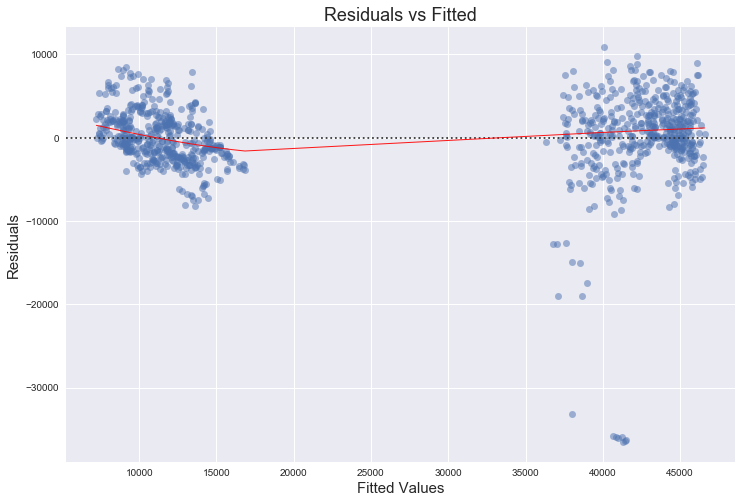

In [24]:
#Residual v Fitted plot
plot_lm_1 = plt.figure(1)

plot_lm_1.set_figheight(8)

plot_lm_1.set_figwidth(12)


plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'Constant_Tuition', data=data,
                                  lowess = True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha':.9})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted Values')
plot_lm_1.axes[0].set_ylabel('Residuals')

abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

# for i in abs_resid_top_3.index:
#     plot_lm_1.axes[0].annotate(i, xy=(model_fitted_y[i], model_residuals[i]));

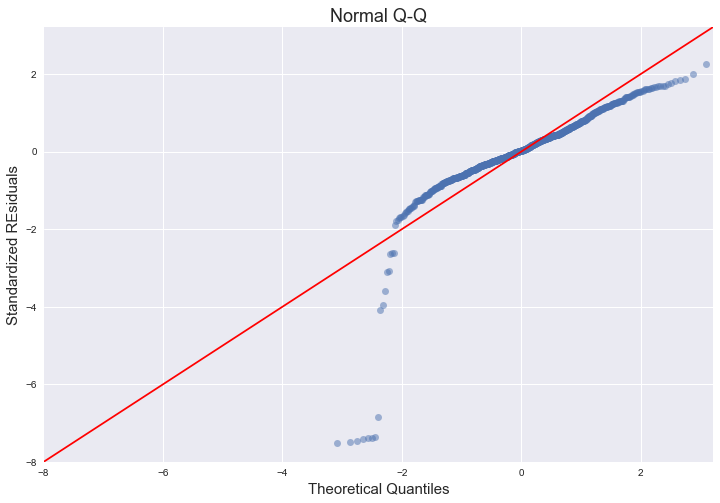

In [25]:
#QQ Plot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized REsiduals');

#annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

# for r, i in enumerate(abs_norm_resid_top_3):
#     plot_lm_2.axes[0].annotate(i, 
#                                xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
#                                    model_norm_residuals[i]));

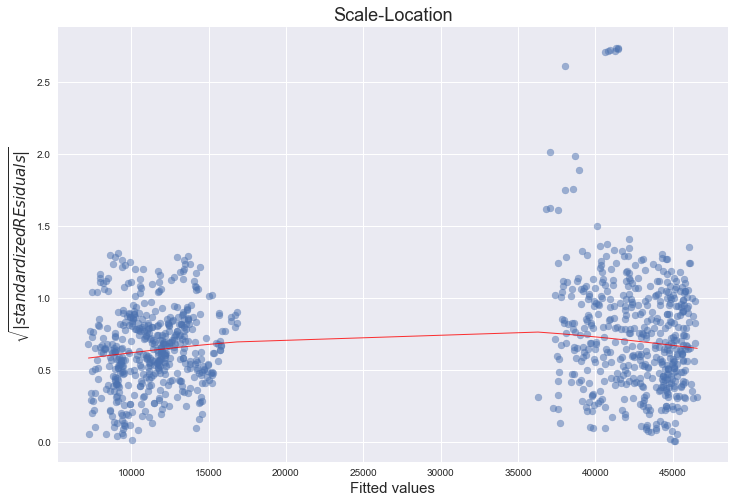

In [26]:
#Scale Location Plot
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': .8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|standardized REsiduals|}$');

#annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

# for i in abs_norm_resid_top_3:
#     plot_lm_3.axes[0].annotate(i,
#                                xy=(model_fitted_y[i],
#                                    model_norm_residuals_abs_sqrt[i]));



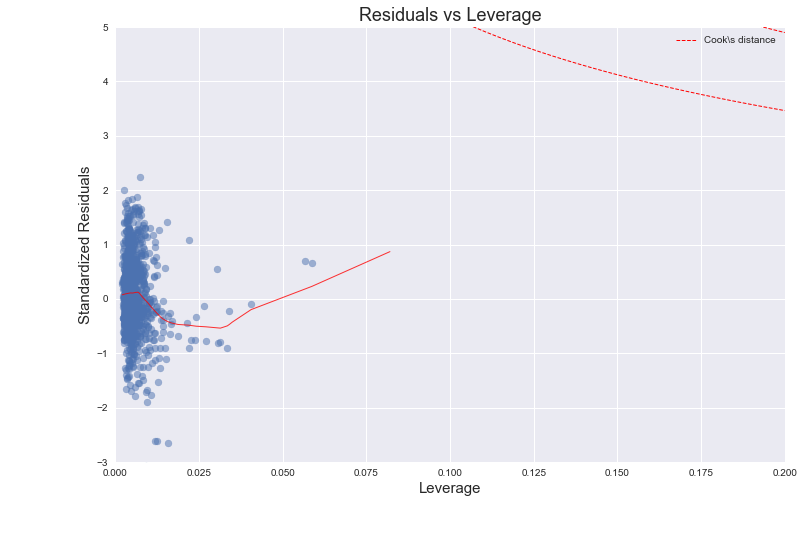

In [8]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=.5)
sns.regplot(model_leverage, model_norm_residuals,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
            
plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')
            
# #annotations
# leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

# for i in leverage_top_3:
#     plot_lm_4.axes[0].annotate(i, xy=(model_leverage[i],
#                                      model_norm_residuals[i]))

#shenanigans for cooks's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label = label, lw=1, ls='--', color='red')
    
p = len(model.params)   #number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1-x)) / x),
     np.linspace(0.001, 0.200, 50),
     'Cook\s distance') #.5 line
graph(lambda x: np.sqrt((1 * p * (1-x)) / x),
     np.linspace(.001, .200, 50)) #1 line
plt.legend(loc = 'upper right');

In [9]:
# Try the Natural Log of the Response Variable.  
data['log_Tuition'] = np.log(data.Constant_Tuition)

# Try Ln of applicants?
data['log_Applicants'] = np.log(data.Applicants)
data['Scaled_APGF'] = data.Constant_APGF / 1000
data['log_APGF'] = np.log(data.Constant_APGF)
data['log_AFSLF'] = np.log(data.Constant_AFSLF)

In [20]:
model1 = ols('Constant_Tuition ~ Constant_APGF + Constant_AFSLF + log_Applicants + rank + Private', data).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:       Constant_Tuition   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     2075.
Date:                Sat, 08 Dec 2018   Prob (F-statistic):               0.00
Time:                        12:26:14   Log-Likelihood:                -9748.9
No. Observations:                 984   AIC:                         1.951e+04
Df Residuals:                     978   BIC:                         1.954e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5158.5201   3612.410      1.

In [11]:
model1_fitted_y = model1.fittedvalues

model1_residuals = model1.resid

model1_norm_residuals = model1.get_influence().resid_studentized_internal

model1_norm_residuals_abs_sqrt = np.sqrt(np.abs(model1_norm_residuals))

model1_abs_resid = np.abs(model1_residuals)

model1_leverage = model1.get_influence().hat_matrix_diag

model1_cooks = model1.get_influence().cooks_distance[0]

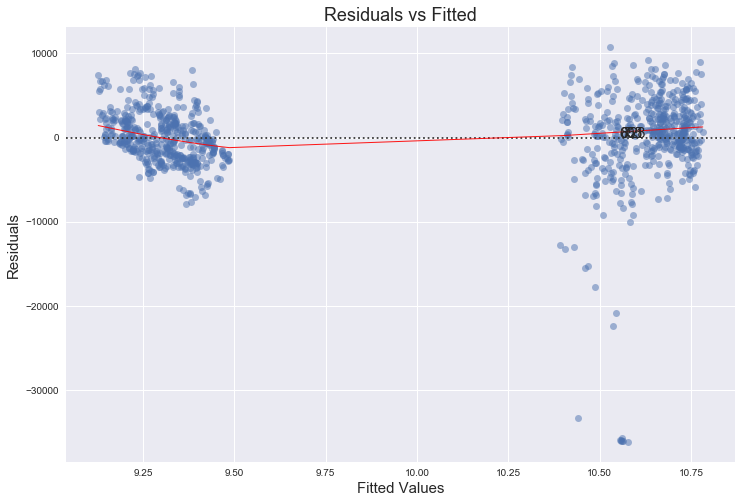

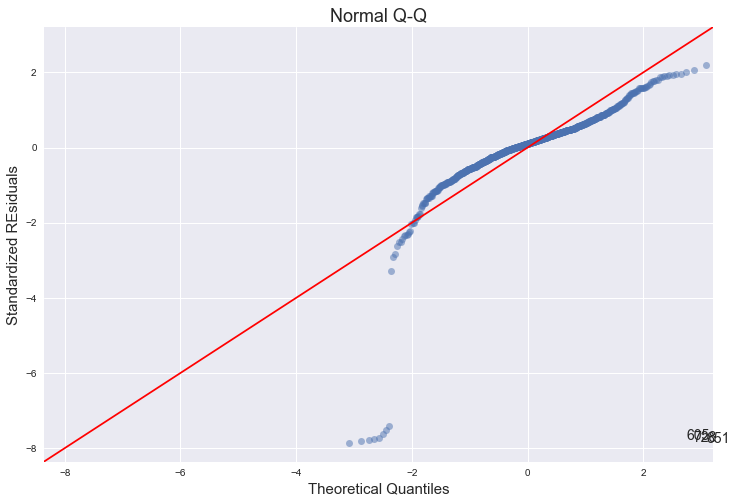

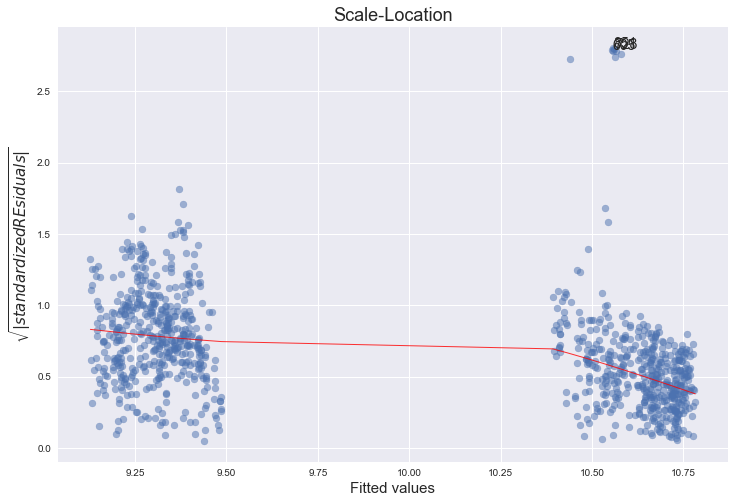

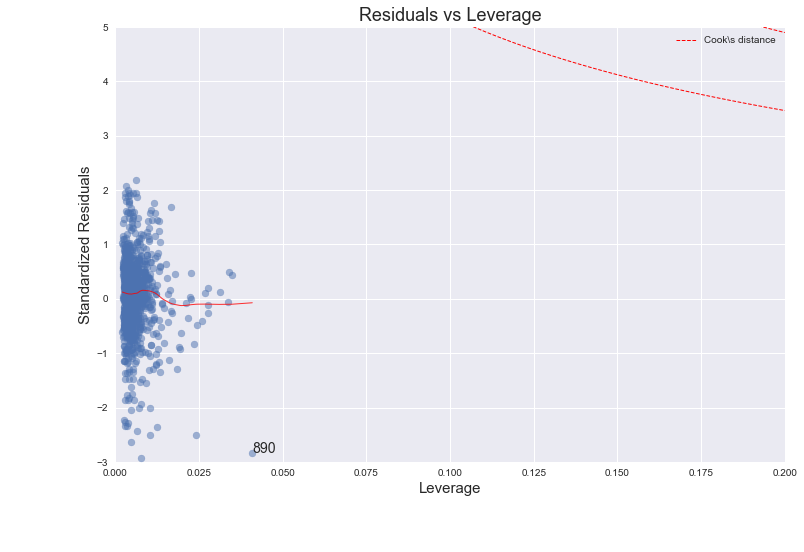

In [12]:
# Rsiduals Plots
#Residual v Fitted plot
plot_lm_1 = plt.figure(1)

plot_lm_1.set_figheight(8)

plot_lm_1.set_figwidth(12)


plot_lm_1.axes[0] = sns.residplot(model1_fitted_y, 'Constant_Tuition', data=data,
                                  lowess = True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha':.9})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted Values')
plot_lm_1.axes[0].set_ylabel('Residuals')

abs_resid = model1_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, xy=(model1_fitted_y[i], model1_residuals[i]));
    
#QQ Plot
QQ = ProbPlot(model1_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized REsiduals');

    #annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model1_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model1_norm_residuals[i]));
    
#Scale Location Plot
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model1_fitted_y, model1_norm_residuals_abs_sqrt, alpha=.5)
sns.regplot(model1_fitted_y, model1_norm_residuals_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': .8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|standardized REsiduals|}$');

#annotations
abs_sq_norm_resid = np.flip(np.argsort(model1_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i,
                               xy=(model1_fitted_y[i],
                                   model1_norm_residuals_abs_sqrt[i]));

plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model1_leverage, model1_norm_residuals, alpha=.5)
sns.regplot(model1_leverage, model1_norm_residuals,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
            
plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')
            
#annotations
leverage_top_3 = np.flip(np.argsort(model1_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, xy=(model1_leverage[i],
                                     model1_norm_residuals[i]))

#shenanigans for cooks's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label = label, lw=1, ls='--', color='red')
    
p = len(model1.params)   #number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1-x)) / x),
     np.linspace(0.001, 0.200, 50),
     'Cook\s distance') #.5 line
graph(lambda x: np.sqrt((1 * p * (1-x)) / x),
     np.linspace(.001, .200, 50)) #1 line
plt.legend(loc = 'upper right');

In [13]:
# Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(data)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

/Users/Alex/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const               3.925083e+06
Constant_Tuition    6.063622e+01
Constant_APGF                inf
Constant_AFSLF      3.161986e+01
rank                1.953572e+00
Private             1.190201e+01
Applicants          5.901875e+00
log_Tuition         3.920417e+01
log_Applicants      5.767424e+00
Scaled_APGF                  inf
log_APGF            3.512756e+02
log_AFSLF           3.220845e+01
dtype: float64

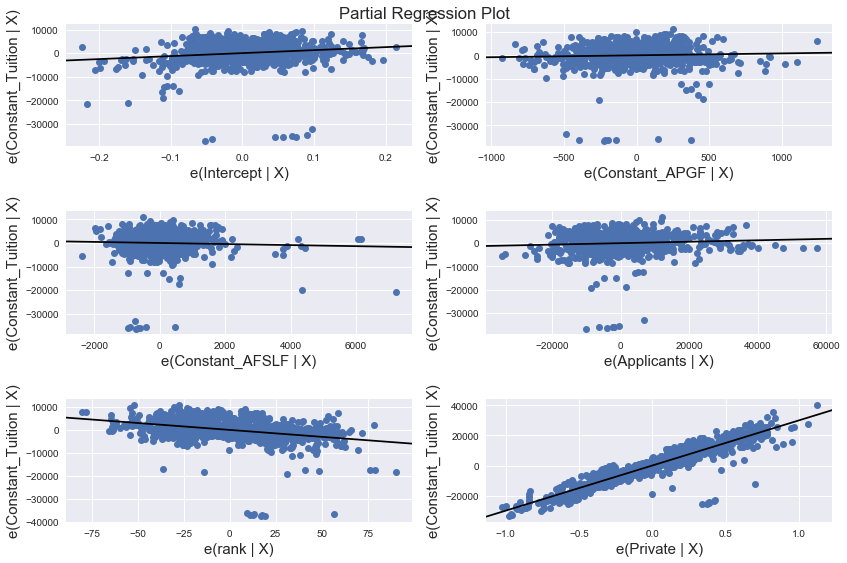

In [48]:
# Partial Regression Plots
fig = plt.figure(figsize=(12,8))
fig.suptitle('Partial Regression Plot', fontsize=14, fontweight='bold')

fig.subplots_adjust(top=.85)

fig = sm.graphics.plot_partregress_grid(model, fig = fig)
plt.show()

In [29]:
#Trying to find outliers!
model_resids = pd.DataFrame(model.resid)

In [30]:
model_resids.loc[model.resid <= -10000, :]

,0
29,-12680.045281
113,-35960.541443
152,-12793.291311
236,-36269.284825
275,-12717.698512
359,-36436.702157
398,-14890.649653
482,-35895.044856
521,-15046.710879
605,-36082.048973


In [32]:
db2.loc[model.resid <= -10000, ['institution_name', 'year']]

,institution_name,year
29,Howard University,2016
113,Brigham Young University-Provo,2016
152,Howard University,2015
236,Brigham Young University-Provo,2015
275,Howard University,2014
359,Brigham Young University-Provo,2014
398,Howard University,2013
482,Brigham Young University-Provo,2013
521,Howard University,2012
605,Brigham Young University-Provo,2012


In [ ]:
db2.dtypes